##### Copyright 2020 The TensorFlow Authors.

In [1]:
import tensorflow as tf
import absl
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [189]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Autoencoders

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/autoencoder">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/autoencoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial introduces autoencoders with three examples: the basics, image denoising, and anomaly detection.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score, mean_squared_log_error

## Load the dataset
To start, you will train the basic autoencoder using the Fashion MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [191]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [192]:
x_train = x_train.astype('float32') / 255.
y_train = y_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_test = y_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## First example: Basic autoencoder
![Basic autoencoder results](images/intro_autoencoder_result.png)

Define an autoencoder with two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


In [193]:

tf.random.set_seed(42)  

l_dim = 64

 #limipia la memoria
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(l_dim, activation='relu'),
  tf.keras.layers.Dense(784, activation='sigmoid'), 
  tf.keras.layers.Reshape((28, 28))
 
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#entrenamos el modelo con x_train y x_train como entrada y salida, ya que el autoencoder cogera la imagen la comprime y descomprime a la salida
history=model.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
119/235 [==============>...............] - ETA: 0s - loss: 0.4363 - accuracy: 0.0619

235/235 [==============================] - 2s 6ms/step - loss: 0.3883 - accuracy: 0.0754 - val_loss: 0.3289 - val_accuracy: 0.0948
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.3156 - accuracy: 0.1040 - val_loss: 0.3082 - val_accuracy: 0.1154
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.2998 - accuracy: 0.1237 - val_loss: 0.2960 - val_accuracy: 0.1319
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2901 - accuracy: 0.1417 - val_loss: 0.2886 - val_accuracy: 0.1502
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.2841 - accuracy: 0.1580 - val_loss: 0.2848 - val_accuracy: 0.1654
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.2808 - accuracy: 0.1706 - val_loss: 0.2818 - val_accuracy: 0.1761
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.2787 - accuracy: 0.1797 - val_loss: 0.2800 - val_accuracy: 0.1842
Epoch 8/10
235/23

In [194]:
model.summary()
print(x_train.shape)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(60000, 28, 28)


Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.


In [195]:
history_dict = history.history
df_history = pd.DataFrame(history_dict)
df_history

,loss,accuracy,val_loss,val_accuracy
0,0.388281,0.075380,0.328883,0.094793
1,0.315566,0.103992,0.308164,0.115446
2,0.299785,0.123740,0.296035,0.131854
3,0.290100,0.141727,0.288603,0.150243
4,0.284126,0.157993,0.284809,0.165350
5,0.280806,0.170643,0.281790,0.176129
6,0.278738,0.179680,0.280017,0.184214
7,0.277180,0.187127,0.278783,0.190529
8,0.275965,0.193286,0.277740,0.198039
9,0.275077,0.198274,0.276913,0.199714


In [196]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
evaluacion = model.evaluate(x_test, x_test)

y_pred=model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)



313/313 [==============================] - 0s 1ms/step


In [197]:
print(x_test.shape)
#redimensionamos las imagenes para poder mostrarlas
x_test_flat = x_test.reshape(x_test.shape[0], -1)
x_test_flat.shape

(10000, 28, 28)


(10000, 784)

Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [198]:

enconded_imgs = model.layers[1](x_test_flat).numpy()
decoded_imgs=model.layers[2](enconded_imgs).numpy()


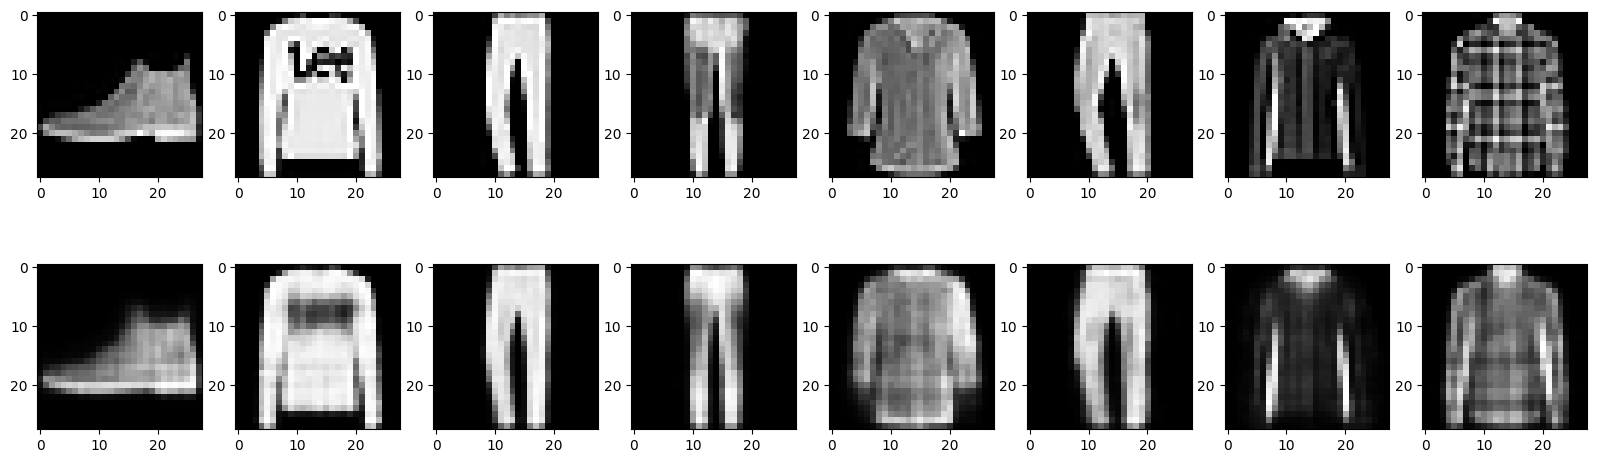

In [199]:
#graficamos las imaganes original y recosntrusidas
plt.figure(figsize=(20,6))

for i in range(8):
    plt.subplot(2,8,i+1)
    plt.imshow(x_test[i], cmap="gray")
    
    
    plt.subplot(2,8,i+9)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")


## second example: Image denoising

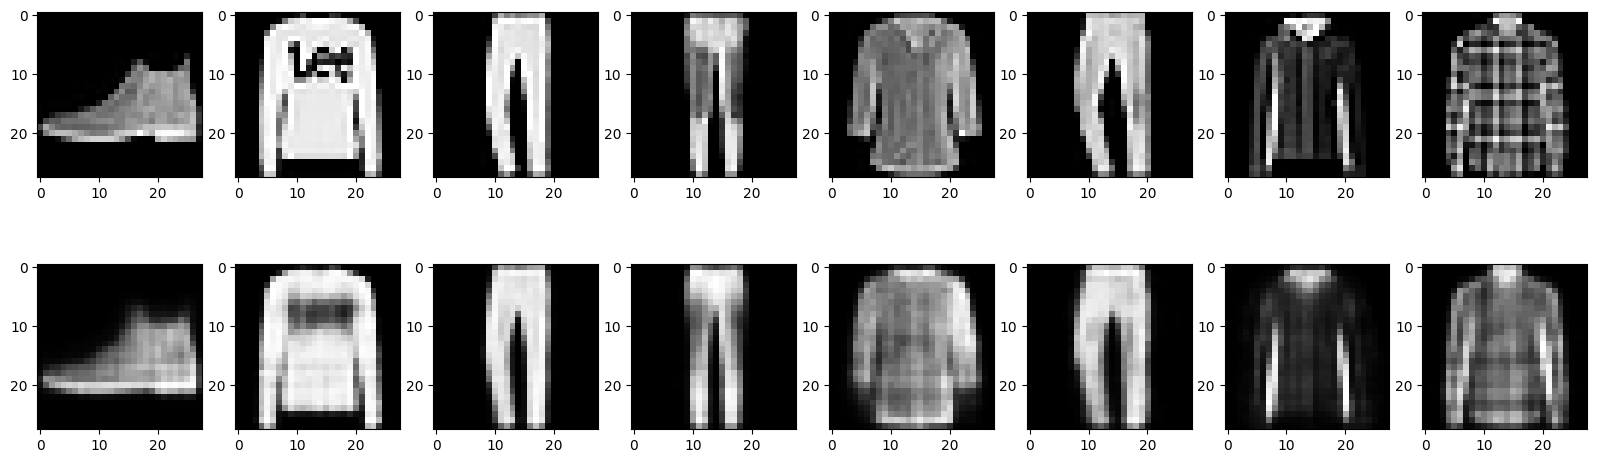

In [200]:
#graficamos las imaganes original y recosntrusidas
plt.figure(figsize=(20,6))

for i in range(8):
    plt.subplot(2,8,i+1)
    plt.imshow(x_test[i], cmap="gray")
    
    
    plt.subplot(2,8,i+9)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")


An autoencoder can also be trained to remove noise from images. In the following section, you will create a noisy version of the Fashion MNIST dataset by applying random noise to each image. You will then train an autoencoder using the noisy image as input, and the original image as the target.

Let's reimport the dataset to omit the modifications made earlier.

In [201]:
df_minist = fashion_mnist.load_data()

In [202]:
#cargamos daortos train y test normalizandolos al dividirlos entre 255
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


agregamos 1 dimension mas 

In [203]:
x_train = x_train[:,:,:, tf.newaxis]#cada ; es una dimension, y donde se pone tf.newasis añade una nueva dimension en esa posicion
x_test = x_test[:,:,:, tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


añadimos ruido a las imagenes y las recalculamos para que tengan valores 0 y 1

In [204]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) #funcion de tensor que crea untensor aleatorio con las mimsa forma en gausiana
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)#limita los valor al rango minimo de 0 y maximo de 1 por el tema de los pixeles
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Plot the noisy images.


In [205]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

le quitameos la dimension de mas para pintar

In [206]:
x_test_pintar=x_test_noisy.numpy().reshape(-1, 28,28)
x_test_pintar.shape

(10000, 28, 28)

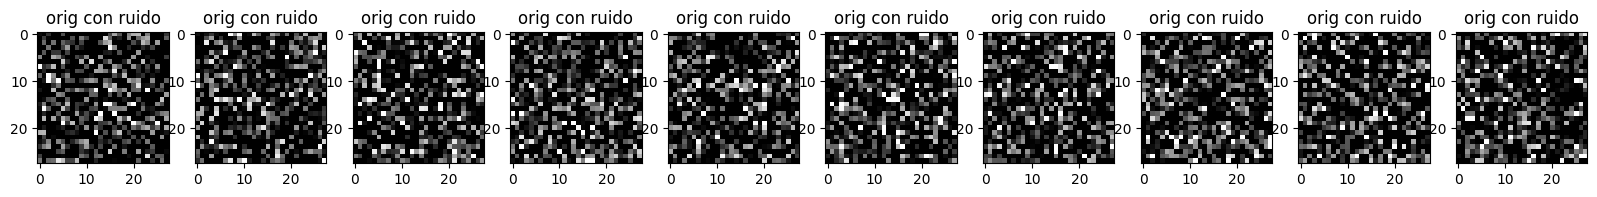

In [207]:

plt.figure(figsize=(20, 6))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.title("orig con ruido")
    plt.imshow(x_test_pintar[i])#tf.squeeze elimna todas las dimensiones con el numero 1, se puede usar aqui directamente a x_test_noisy tb)
    plt.gray()
plt.show()

hemos introduico rudio en las imagenes y ahoras con el autoencoder vamos a codificar con capas convolucionales, apliaciones de ellas y decodificar con la convolucion inversa mas una ca de ampliacion de pixeles

In [497]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Reshape, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose

In [507]:
input_img = tf.keras.layers.Input(shape=(28,28,1))  

model_encoded = tf.keras.models.Sequential([
    input_img,
    tf.keras.layers.Conv2D(128,(3,3), activation="relu",padding="same"),#realiza la convolucion de la imagen con el filtro parate a parte para dar una salida de un solo numero
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),#realiza una reduccion de la imagen a 4x4
    tf.keras.layers.Conv2D(64,(3,3), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2,2),padding="same"),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
 

])
encoded = model_encoded(input_img)

model_decoded = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(7,7,32)),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2DTranspose(64,(3,3), activation="relu",padding="same"),#esta capa se encarga de realziar la operacion inversa a la capa concolucional, es decir descomprime la imagen
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2DTranspose(1,(3,3), activation="sigmoid", padding="same")
    ])


In [508]:
model_encoded.summary()

Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_165 (Conv2D)         (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_161 (MaxPool  (None, 14, 14, 128)       0         
 ing2D)                                                          
                                                                 
 conv2d_166 (Conv2D)         (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_162 (MaxPool  (None, 7, 7, 64)          0         
 ing2D)                                                          
                                                                 
 conv2d_167 (Conv2D)         (None, 7, 7, 32)          18464     
                                                                 
Total params: 93536 (365.38 KB)
Trainable params: 93

In [509]:
model_decoded.summary()

Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_139 (UpSampl  (None, 14, 14, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_transpose_140 (Conv  (None, 14, 14, 64)        18496     
 2DTranspose)                                                    
                                                                 
 up_sampling2d_140 (UpSampl  (None, 28, 28, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_transpose_141 (Conv  (None, 28, 28, 1)         577       
 2DTranspose)                                                    
                                                                 
Total params: 19073 (74.50 KB)
Trainable params: 190

In [510]:
encoded=...
decoded=...

In [511]:
#aaplicamos una entrada de imagen a encoded
encoded=model_encoded(input_img)
print(encoded.shape)


(None, 7, 7, 32)


In [512]:
decoded= model_decoded(encoded)
print(decoded.shape)

(None, 28, 28, 1)


In [513]:
decoded = model_decoded(encoded)

In [514]:
autoencoder = keras.Model(inputs=input_img, outputs=decoded)

In [515]:
print(encoded.shape) 
print(encoded.dtype) 
print(decoded.shape) 
print(decoded.dtype)


(None, 7, 7, 32)
<dtype: 'float32'>
(None, 28, 28, 1)
<dtype: 'float32'>


In [516]:
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_127 (InputLayer)      [(None, 28, 28, 1)]       0         
                                                                 
 sequential_139 (Sequential  (None, 7, 7, 32)          93536     
 )                                                               
                                                                 
 sequential_140 (Sequential  (None, 28, 28, 1)         19073     
 )                                                               
                                                                 
Total params: 112609 (439.88 KB)
Trainable params: 112609 (439.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [517]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

historia=autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 82s 344ms/step - loss: 0.0214 - accuracy: 0.5020 - val_loss: 0.0086 - val_accuracy: 0.4999
Epoch 2/10
235/235 [==============================] - 81s 344ms/step - loss: 0.0086 - accuracy: 0.5021 - val_loss: 0.0086 - val_accuracy: 0.4999
Epoch 3/10
235/235 [==============================] - 79s 337ms/step - loss: 0.0085 - accuracy: 0.5021 - val_loss: 0.0085 - val_accuracy: 0.4999
Epoch 4/10
235/235 [==============================] - 80s 339ms/step - loss: 0.0085 - accuracy: 0.5021 - val_loss: 0.0085 - val_accuracy: 0.4999
Epoch 5/10
235/235 [==============================] - 80s 339ms/step - loss: 0.0085 - accuracy: 0.5021 - val_loss: 0.0085 - val_accuracy: 0.4999
Epoch 6/10
235/235 [==============================] - 79s 337ms/step - loss: 0.0085 - accuracy: 0.5021 - val_loss: 0.0085 - val_accuracy: 0.4999
Epoch 7/10
235/235 [==============================] - 79s 336ms/step - loss: 0.0084 - accuracy: 0.5021 - val_loss: 0.0085 - val_ac

In [524]:
encoder_img= autoencoder.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [526]:
decoder_img= autoencoder.predict(encoder_img)

313/313 [==============================] - 5s 15ms/step


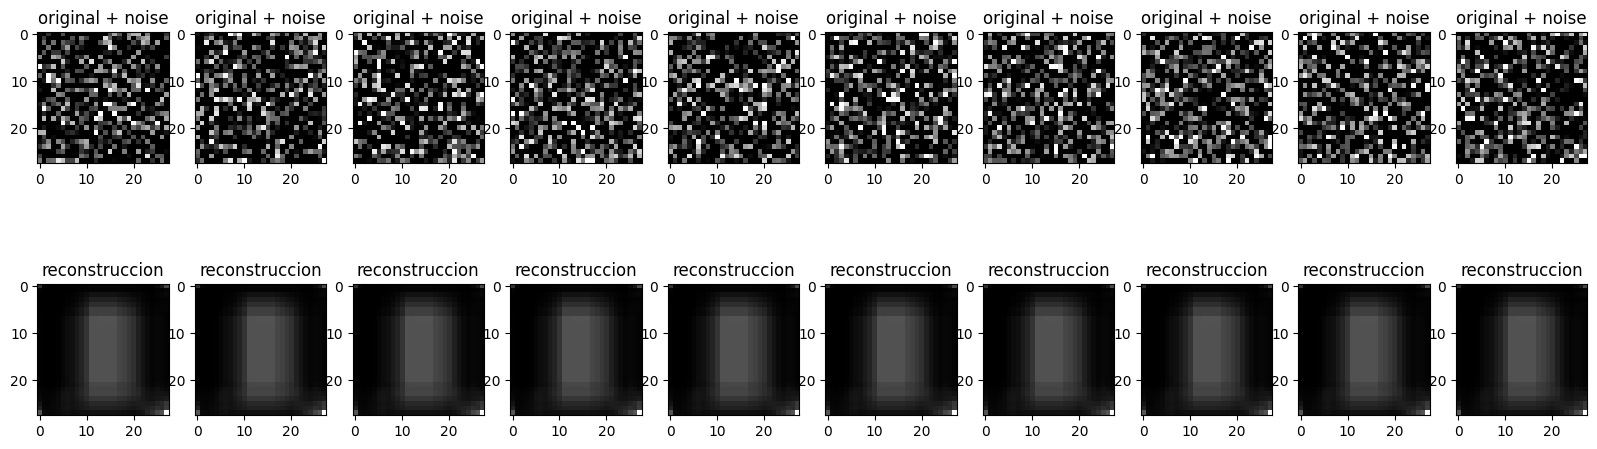

In [530]:
plt.figure(figsize=(20, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))#quita las dimensiones que sean 1
    plt.gray()
     
    plt.subplot(2, 10, i + 10 + 1)
    plt.title("reconstruccion")
    plt.imshow(tf.squeeze(decoder_img[i]))
    plt.gray()
   
plt.show()

In this example, you will train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.

## Third example: Anomaly detection

## Overview


In this example, you will train an autoencoder to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). You are interested in identifying the abnormal rhythms.

Note: This is a labeled dataset, so you could phrase this as a supervised learning problem. The goal of this example is to illustrate anomaly detection concepts you can apply to larger datasets, where you do not have labels available (for example, if you had many thousands of normal rhythms, and only a small number of abnormal rhythms).

How will you detect anomalies using an autoencoder? Recall that an autoencoder is trained to minimize reconstruction error. You will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. You will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [ ]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

In [ ]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to `[0,1]`.


In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

Notice that the autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

You will soon classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.


Plot the reconstruction error on normal ECGs from the training set

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial. 

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the [precision](https://developers.google.com/machine-learning/glossary#precision) and [recall](https://developers.google.com/machine-learning/glossary#recall) of your classifier. 

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

## Next steps

To learn more about anomaly detection with autoencoders, check out this excellent [interactive example](https://anomagram.fastforwardlabs.com/#/) built with TensorFlow.js by Victor Dibia. For a real-world use case, you can learn how [Airbus Detects Anomalies in ISS Telemetry Data](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data-tfx.html) using TensorFlow. To learn more about the basics, consider reading this [blog post](https://blog.keras.io/building-autoencoders-in-keras.html) by François Chollet. For more details, check out chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
